<a href="https://colab.research.google.com/github/sbarreto10/data-science-2022/blob/main/VALORES%20HUMANOS%20(PROYECTO%20FINAL)/75_06_TP_4_MODELO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTACIONES**

In [ ]:
import os
os.environ['DISABLE_COLAB_TF_IMPORT_HOOK'] = '1'

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
import string
import colorsys
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
from nltk.corpus import stopwords
stopwordsEn = set(stopwords.words("english"))
from nltk.tokenize import sent_tokenize, word_tokenize
# !pip install umap-learn
# from umap import UMAP
from math import cos,sin,pi
from tqdm import tqdm
import colorsys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Dense, TextVectorization, Dropout, Lambda, concatenate, LayerNormalization, Embedding
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
import tensorflow_hub as hub

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#**LECTURA**

In [ ]:
random.seed(1312)

In [ ]:
args = pd.read_csv("/content/drive/MyDrive/tp4/human-values/arguments-training.tsv", sep="\t")
labels = pd.read_csv("/content/drive/MyDrive/tp4/human-values/labels-training.tsv", sep="\t")

In [ ]:
args.shape, labels.shape

((5220, 4), (5220, 21))

In [ ]:
args[100:105]

,Argument ID,Conclusion,Stance,Premise
100,A05021,We should legalize cannabis,in favor of,Legalizing marijuana would lead to a reduction...
101,A05022,We should adopt gender-neutral language,in favor of,we should adopt gender-neutral language becaus...
102,A05023,We should ban algorithmic trading,in favor of,algorithmic trading should be banned as it man...
103,A05024,We should fight urbanization,against,urbanization allows people to move away from h...
104,A05025,Holocaust denial should be a criminal offence,against,everyone should have the right to their own op...


In [ ]:
args.describe()

,Argument ID,Conclusion,Stance,Premise
count,5220,5220,5220,5220
unique,5220,123,2,5220
top,A01001,Surrogacy should be banned,in favor of,if entrapment can serve to more easily capture...
freq,1,77,2738,1


In [ ]:
labels.columns

Index(['Argument ID', 'Self-direction: thought', 'Self-direction: action',
       'Stimulation', 'Hedonism', 'Achievement', 'Power: dominance',
       'Power: resources', 'Face', 'Security: personal', 'Security: societal',
       'Tradition', 'Conformity: rules', 'Conformity: interpersonal',
       'Humility', 'Benevolence: caring', 'Benevolence: dependability',
       'Universalism: concern', 'Universalism: nature',
       'Universalism: tolerance', 'Universalism: objectivity'],
      dtype='object')

In [ ]:
labels.describe()

,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
count,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000
mean,0.174904,0.255172,0.059770,0.038697,0.268199,0.088314,0.108429,0.071648,0.375670,0.311686,0.114559,0.234100,0.041571,0.083908,0.287356,0.146743,0.381609,0.068582,0.135824,0.179502
std,0.379922,0.436000,0.237083,0.192891,0.443064,0.283778,0.310951,0.257928,0.484342,0.463227,0.318520,0.423475,0.199626,0.277276,0.452573,0.353884,0.485828,0.252767,0.342634,0.383809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#**PREPROCESAMIENTO GENERAL**

In [ ]:
humanValues = args.merge(labels, how="inner", on="Argument ID")

In [ ]:
humanValues["Stance"] = humanValues["Stance"].map(lambda x: 1 if x=="in favor of" else -1)

In [ ]:
del [args, labels]

In [ ]:
X = humanValues[['Conclusion', 'Stance', 'Premise']]
y = humanValues[['Self-direction: thought', 'Self-direction: action', 'Stimulation',
       'Hedonism', 'Achievement', 'Power: dominance', 'Power: resources',
       'Face', 'Security: personal', 'Security: societal', 'Tradition',
       'Conformity: rules', 'Conformity: interpersonal', 'Humility',
       'Benevolence: caring', 'Benevolence: dependability',
       'Universalism: concern', 'Universalism: nature',
       'Universalism: tolerance', 'Universalism: objectivity']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=404)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=505)

In [ ]:
X_train = X_train.reset_index().drop(columns=["index"])
X_val = X_val.reset_index().drop(columns=["index"])
X_test = X_test.reset_index().drop(columns=["index"])
y_train = y_train.reset_index().drop(columns=["index"])
y_val = y_val.reset_index().drop(columns=["index"])
y_test = y_test.reset_index().drop(columns=["index"])

In [ ]:
humanValues[humanValues['Hedonism']==1]

,Argument ID,Conclusion,Stance,Premise,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,...,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
147,A05080,We should ban telemarketing,-1,We should not ban telemarketing as it it allow...,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
150,A05083,We should legalize prostitution,1,legalising prostitution will ensure the safety...,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
151,A05084,The vow of celibacy should be abandoned,1,we should abandon the vow of celibacy because ...,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
154,A05088,We should abandon the use of school uniform,1,"if you are not required to wear a uniform, you...",1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
158,A05093,We should ban the use of child actors,1,child actors lose the sense of a proper childh...,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,A21075,Homeopathy brings more harm than good,-1,homeopathy brings more good than harm when it ...,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4836,A22129,We should legalize sex selection,1,Legalizing sex selection will help parents to ...,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5058,C26039,We should restrict minors from playing online ...,1,Many teenagers in China use electronic devices...,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
5063,C26044,We should restrict minors from playing online ...,-1,"Rather than restricting minors to play games, ...",0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


#**ANÁLISIS DEL BALANCE DE LOS LABELS**

In [ ]:
def hsv_to_hex(h,s,v):
    (r,g,b) = colorsys.hsv_to_rgb(h/360, s/100, v/100)
    (r,g,b) = (r*255,g*255,b*255)
    return '#%02x%02x%02x' % (int(r), int(g), int(b))

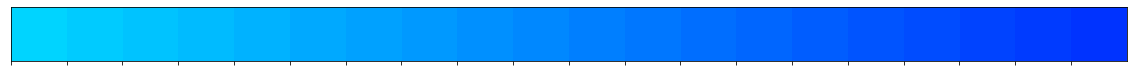

In [ ]:
sec1 = [hsv_to_hex(150-2*i, 100, 100) for i in range(20)]
sec2 = [hsv_to_hex(190+2*i, 100, 100) for i in range(20)]
sns.palplot(sec2)

<ipython-input-17-1bf348ba1495>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_facecolor("#111111")


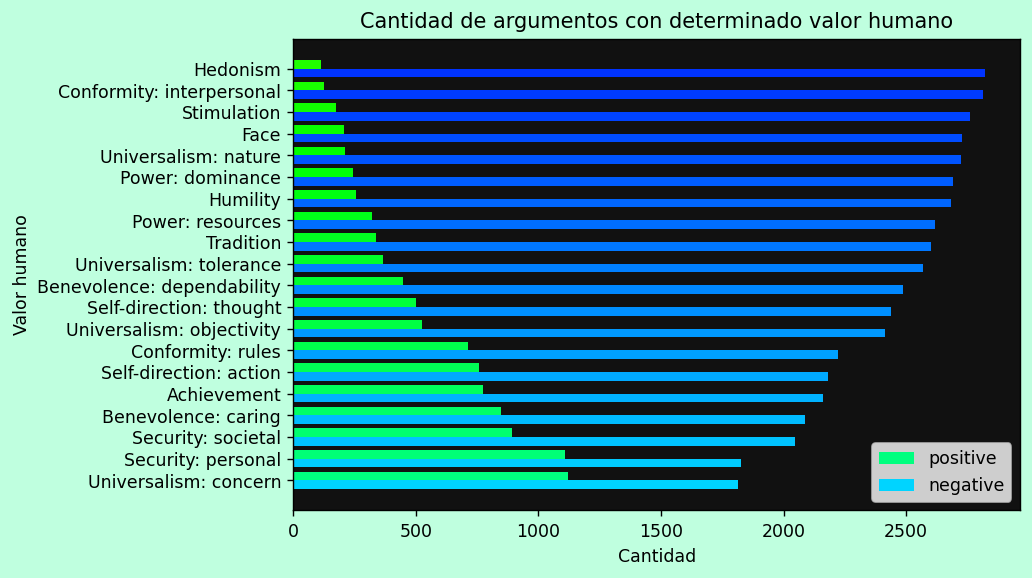

In [ ]:
positive = y_train.sum().sort_values(ascending=False)
negative = len(y_train) - positive

plt.figure(dpi=125, figsize=(7.5,5), facecolor=hsv_to_hex(150, 25, 100))

X_axis = np.arange(len(positive.index))

plt.barh(X_axis + 0.2, positive, 0.4, label = 'positive', color=sec1)
plt.barh(X_axis - 0.2, negative, 0.4, label = 'negative', color=sec2)
plt.axes().set_facecolor("#111111")

plt.yticks(X_axis, negative.index)
plt.ylabel("Valor humano")
plt.xlabel("Cantidad")
plt.title("Cantidad de argumentos con determinado valor humano")
plt.legend()

#**PREPROCESAMIENTO NN-A**

In [ ]:
!pip install fasttext
import fasttext
import fasttext.util
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.7 MB/s 
  Using cached pybind11-2.10.1-py3-none-any.whl (216 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-linux_x86_64.whl size=3132365 sha256=062415c3c2fcdd85e27b77ea6db6dd2b78013d24818b4fada9a963661c25feb2
  Stored in directory: /root/.cache/pip/wheels/93/61/2a/c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fasttext
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def lower_df(df, columns=["Conclusion","Premise"]):
    for c in columns:
        df[c] = df[c].map(lambda x: x.lower())
    return df

for df in [X_train, X_val, X_test]:
    df = lower_df(df)

In [ ]:
# fasttext.util.download_model('en', if_exists='ignore')  # English
# ft = fasttext.load_model('cc.en.300.bin')
# modelFT = ft
# modelFT.save_model("/content/drive/MyDrive/tp4/human-values/modelFTtp4.bin")

In [ ]:
modelFT = fasttext.load_model("/content/drive/MyDrive/tp4/human-values/modelFTtp4.bin")

In [ ]:
def fasttext_df(sentences):

    sentDict = {}
    for sent in sentences:
        sentDict[sent] = modelFT.get_sentence_vector(sent).tolist()

    return sentDict

In [ ]:
fasttextSize=300

def fasttext_df(sentences):

    sentDict = {}
    for sent in sentences:
        sentDict[sent] = modelFT.get_sentence_vector(sent).tolist()

    return sentDict

premisesTrain = X_train.Premise.tolist()
premisesVal = X_val.Premise.tolist()
premisesTest = X_test.Premise.tolist()
conclusionsTrain = X_train.Conclusion.tolist()
conclusionsVal = X_val.Conclusion.tolist()
conclusionsTest = X_test.Conclusion.tolist()

fasttextPremisesTrainDf = pd.DataFrame( fasttext_df(premisesTrain) ).T
fasttextPremisesValDf = pd.DataFrame( fasttext_df(premisesVal) ).T
fasttextPremisesTestDf = pd.DataFrame( fasttext_df(premisesTest) ).T

fasttextConclusionsTrainDf = pd.DataFrame( fasttext_df(conclusionsTrain) ).T.reset_index().rename(columns={"index":"Conclusion"})
fasttextConclusionsValDf = pd.DataFrame( fasttext_df(conclusionsVal) ).T.reset_index().rename(columns={"index":"Conclusion"})
fasttextConclusionsTestDf = pd.DataFrame( fasttext_df(conclusionsTest) ).T.reset_index().rename(columns={"index":"Conclusion"})

fasttextConclusionsTrainDf = X_train.merge(fasttextConclusionsTrainDf, on="Conclusion")
fasttextConclusionsValDf = X_val.merge(fasttextConclusionsValDf, on="Conclusion")
fasttextConclusionsTestDf = X_test.merge(fasttextConclusionsTestDf, on="Conclusion")

for df in [fasttextConclusionsTrainDf, fasttextConclusionsValDf, fasttextConclusionsTestDf]:
    for i in range(fasttextSize):
        df[i] = df["Stance"]*df[i]

fasttextConclusionsTrainDf = fasttextConclusionsTrainDf[[i for i in range(fasttextSize)]]
fasttextConclusionsValDf = fasttextConclusionsValDf[[i for i in range(fasttextSize)]]
fasttextConclusionsTestDf = fasttextConclusionsTestDf[[i for i in range(fasttextSize)]]

del [premisesTrain, premisesVal, premisesTest, conclusionsTrain, conclusionsVal, conclusionsTest]

In [ ]:
vectorizer1 = TfidfVectorizer(lowercase=True, max_features=500)

vectorizer1.fit(X_train.Conclusion)

ConclusionWords = ["Conclusion-"+w.capitalize() for w in vectorizer1.get_feature_names_out()]

for df in [X_train, X_val, X_test]:
    wordMatrix = vectorizer1.transform(df.Conclusion)
    df[ConclusionWords] = pd.DataFrame(wordMatrix.todense(), columns=ConclusionWords, index=df.index)
    for c in ConclusionWords:
        df[c] = df["Stance"]*df[c]

tfidfConclusionTrainDf = X_train[ConclusionWords]
tfidfConclusionValDf = X_val[ConclusionWords]
tfidfConclusionTestDf = X_test[ConclusionWords]
tfidfConclusionSize = len(ConclusionWords)

del [vectorizer1, ConclusionWords, wordMatrix]

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


In [ ]:
scaler1, scaler2, scaler3 = StandardScaler(), StandardScaler(), StandardScaler()

scaler1.fit(fasttextConclusionsTrainDf)
scaler2.fit(fasttextPremisesTrainDf)
scaler3.fit(tfidfConclusionTrainDf)

fasttextConclusionsTrainDf[:] = scaler1.transform(fasttextConclusionsTrainDf)
fasttextPremisesTrainDf[:] = scaler2.transform(fasttextPremisesTrainDf)
tfidfConclusionTrainDf[:] = scaler3.transform(tfidfConclusionTrainDf)
fasttextConclusionsValDf[:] = scaler1.transform(fasttextConclusionsValDf)
fasttextPremisesValDf[:] = scaler2.transform(fasttextPremisesValDf)
tfidfConclusionValDf[:] = scaler3.transform(tfidfConclusionValDf)
fasttextConclusionsTestDf[:] = scaler1.transform(fasttextConclusionsTestDf)
fasttextPremisesTestDf[:] = scaler2.transform(fasttextPremisesTestDf)
tfidfConclusionTestDf[:] = scaler3.transform(tfidfConclusionTestDf)

del [scaler1, scaler2, scaler3]

<ipython-input-25-1e994226cb2a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidfConclusionTrainDf[:] = scaler3.transform(tfidfConclusionTrainDf)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

#**NN-A: TFIDF&FASTTEXT VECTORS AS INPUTS**

In [ ]:
def label_weights(y):
    y = y.to_numpy()
    weights = []
    for i in range(y.shape[1]):
        ones = sum(y[:,i])
        ratio = min(ones/(y.shape[0]-ones), (y.shape[0]-ones)/ones)
        weights.append(1e-6 if ratio<0.1 else 1)
    return weights

In [ ]:
labelWeights = label_weights(y_train)

In [ ]:
{y_train.columns[i]: labelWeights[i] for i in range(20)}

{'Self-direction: thought': 1,
 'Self-direction: action': 1,
 'Stimulation': 1e-06,
 'Hedonism': 1e-06,
 'Achievement': 1,
 'Power: dominance': 1e-06,
 'Power: resources': 1,
 'Face': 1e-06,
 'Security: personal': 1,
 'Security: societal': 1,
 'Tradition': 1,
 'Conformity: rules': 1,
 'Conformity: interpersonal': 1e-06,
 'Humility': 1e-06,
 'Benevolence: caring': 1,
 'Benevolence: dependability': 1,
 'Universalism: concern': 1,
 'Universalism: nature': 1e-06,
 'Universalism: tolerance': 1,
 'Universalism: objectivity': 1}

In [ ]:
trainInput = (tfidfConclusionTrainDf[:], fasttextConclusionsTrainDf[:], fasttextPremisesTrainDf[:])
valInput = (tfidfConclusionValDf[:], fasttextConclusionsValDf[:], fasttextPremisesValDf[:])

In [ ]:
class prediction_history(Callback):
    def __init__(self):
        self.predhis = []
    def on_epoch_end(self, epoch, logs={}):
        self.predhis.append(model.predict(valInput))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


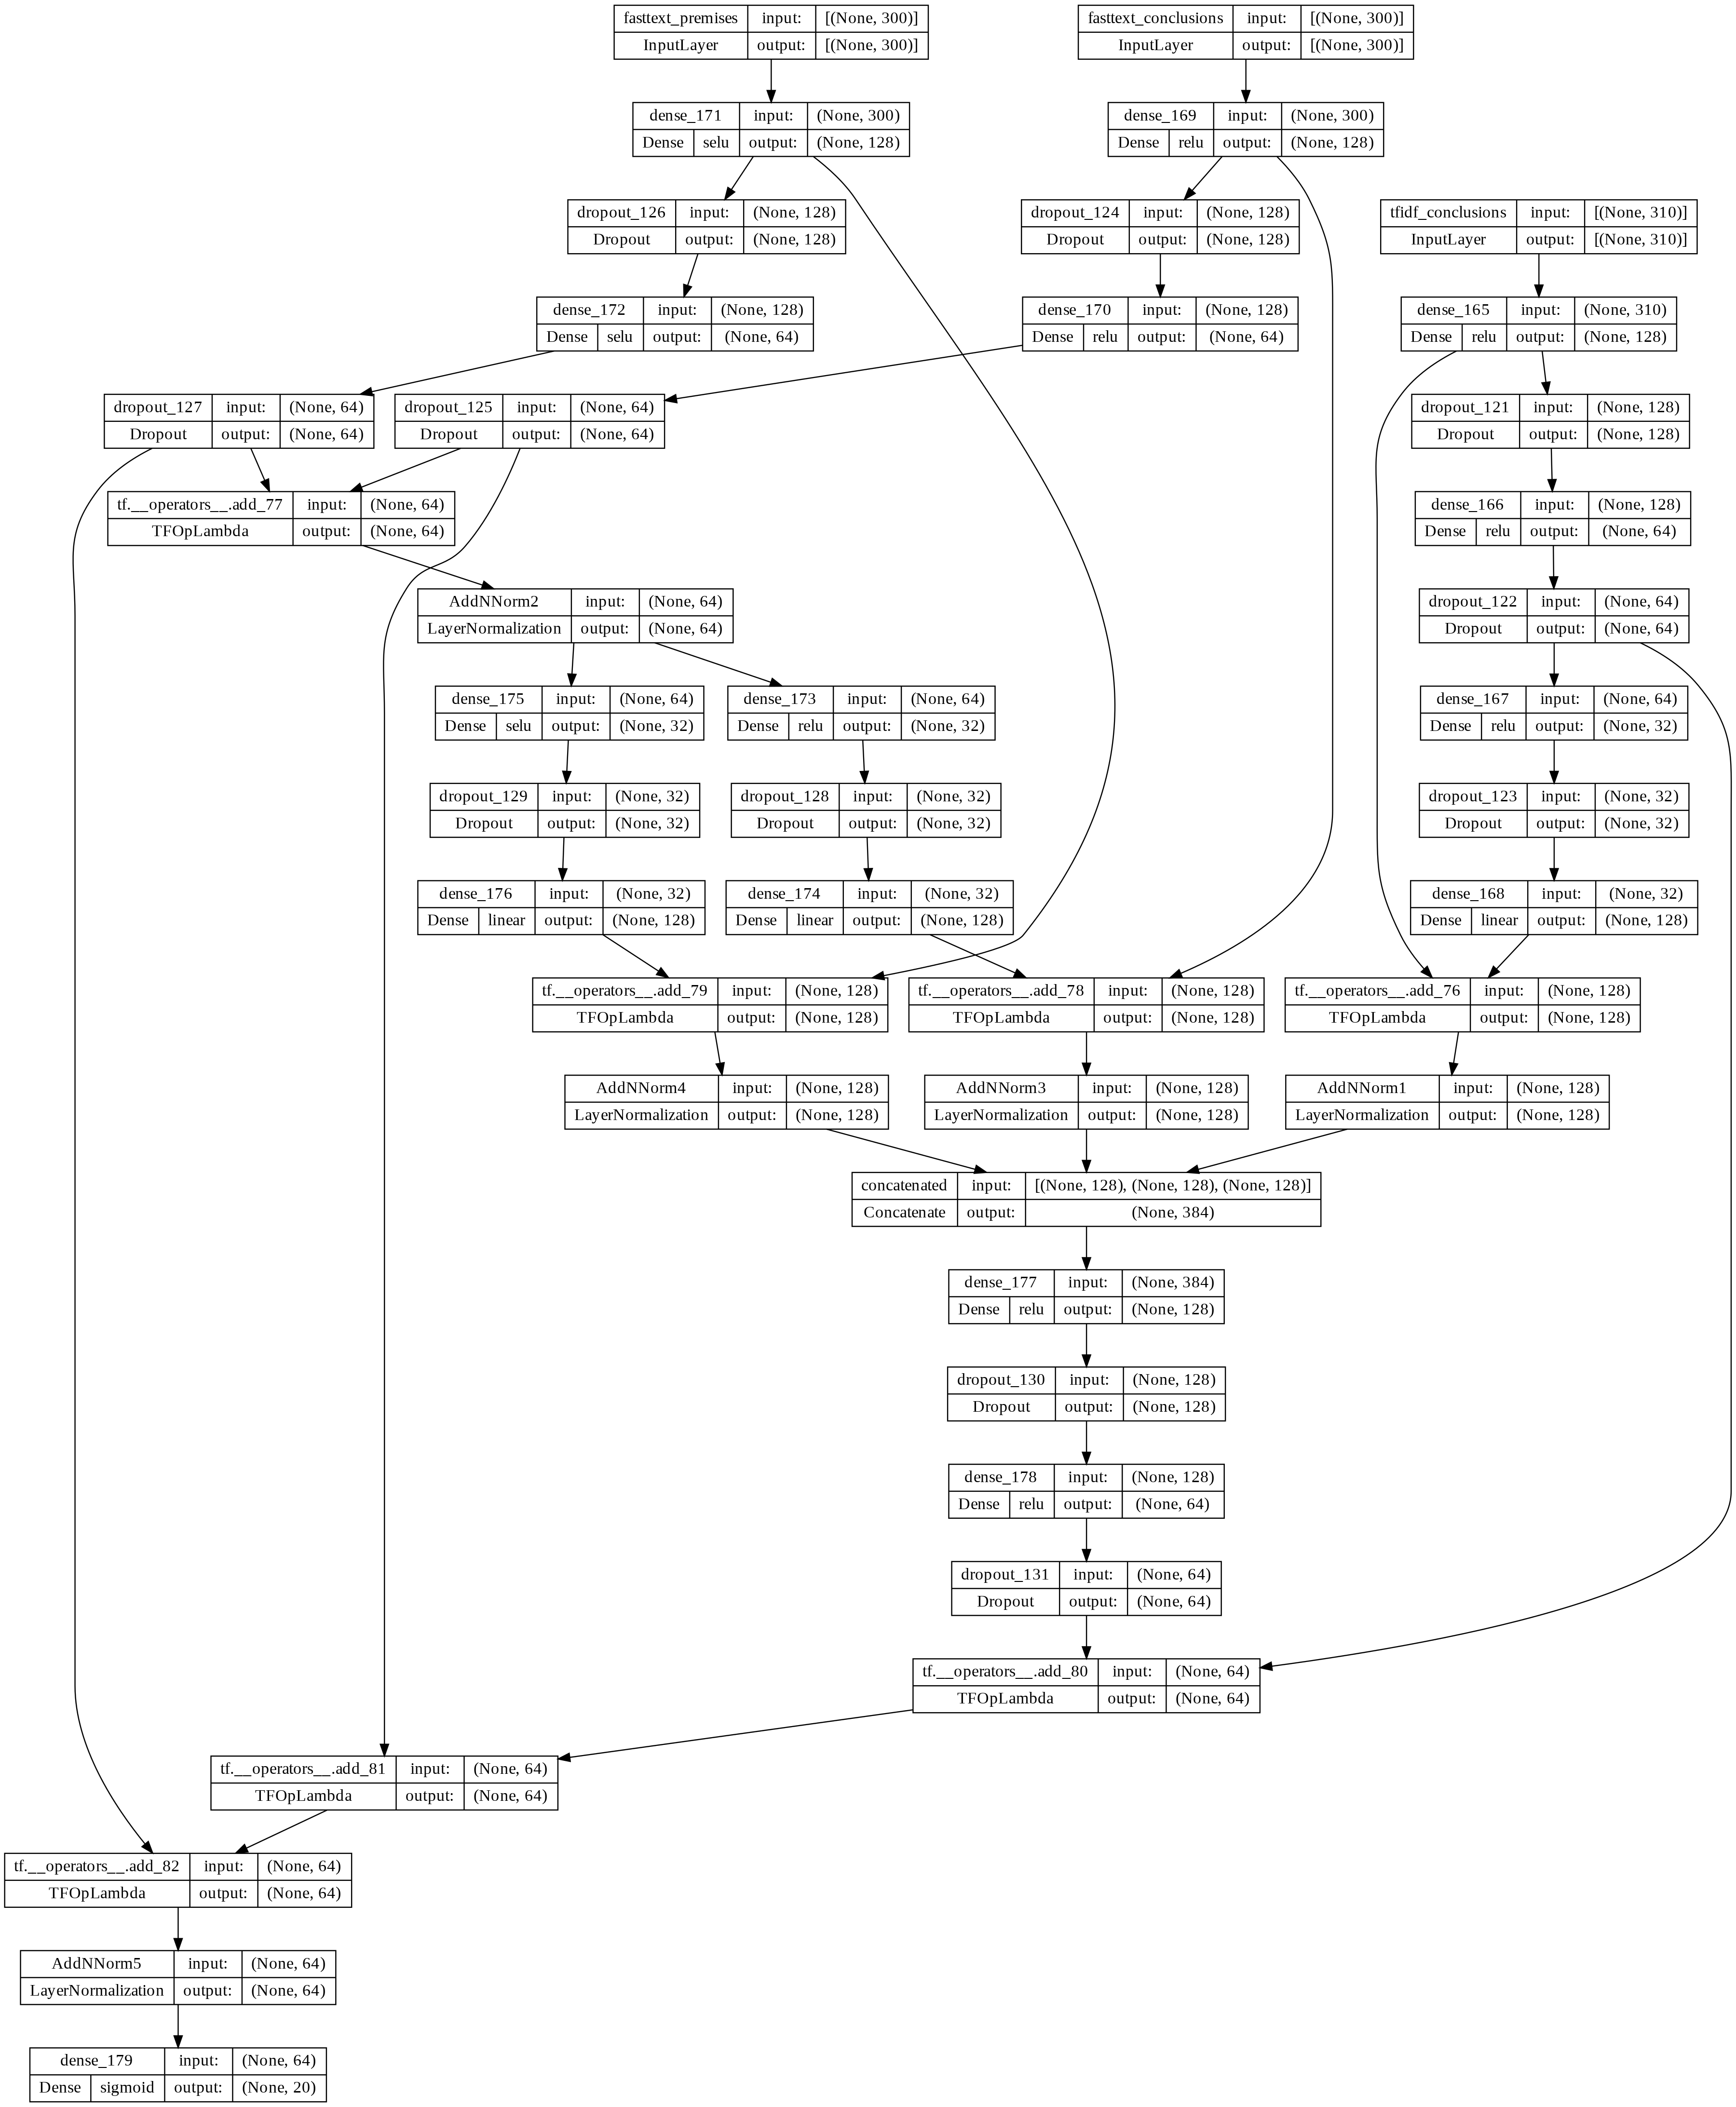

In [ ]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

regularizer = l1(1e-5)

aIn = Input(shape=(tfidfConclusionSize,), name="tfidf_conclusions")

a1 = Dense(128, activation="relu", activity_regularizer=regularizer)(aIn)
a = Dropout(.15)(a1)
a = Dense(64, activation="relu", activity_regularizer=regularizer)(a)
a2 = Dropout(.15)(a)
a = Dense(32, activation="relu", activity_regularizer=regularizer)(a2)
a = Dropout(.15)(a)
a = Dense(128, activity_regularizer=regularizer)(a)
aOut = LayerNormalization(epsilon=1e-6, name="AddNNorm1")(a + a1)

bIn = Input(shape=(fasttextSize,), name="fasttext_conclusions")
b1 = Dense(128, activation="relu", activity_regularizer=regularizer)(bIn)
b = Dropout(.15)(b1)
b = Dense(64, activation="relu", activity_regularizer=regularizer)(b)
b2 = Dropout(.15)(b)

cIn = Input(shape=(fasttextSize,), name="fasttext_premises")
c1 = Dense(128, activation="selu", activity_regularizer=regularizer)(cIn)
c = Dropout(.1)(c1)
c = Dense(64, activation="selu", activity_regularizer=regularizer)(c)
c2 = Dropout(.1)(c)

bc = LayerNormalization(epsilon=1e-6, name="AddNNorm2")(b2 + c2)

b = Dense(32, activation="relu", activity_regularizer=regularizer)(bc)
b = Dropout(.15)(b)
b = Dense(128, activity_regularizer=regularizer)(b)
bOut = LayerNormalization(epsilon=1e-6, name="AddNNorm3")(b + b1)

c = Dense(32, activation="selu", activity_regularizer=regularizer)(bc)
c = Dropout(.1)(c)
c = Dense(128, activity_regularizer=regularizer)(c)
cOut = LayerNormalization(epsilon=1e-6, name="AddNNorm4")(c + c1)

z = concatenate([aOut, bOut, cOut], name="concatenated")
z = Dense(128, activation="relu", activity_regularizer=regularizer)(z)
z = Dropout(.15)(z)
z = Dense(64, activation="relu", activity_regularizer=regularizer)(z)
z = Dropout(.15)(z)
z = LayerNormalization(epsilon=1e-6, name="AddNNorm5")(z + a2 + b2 + c2)

zOut = Dense(len(y_train.columns),activation="sigmoid")(z)

model = Model(inputs=[(aIn, bIn, cIn)], outputs=zOut, name="tfidf-fasttext")

model.compile(loss="mse",loss_weights=labelWeights,
              optimizer=Adam(lr=7e-4), metrics=["acc"])

plot_model(model,
           show_shapes=True,
           to_file='/content/drive/MyDrive/tp4/human-values/nnHumanValues.png',
           dpi=175,
           show_layer_activations=True
           )

In [ ]:
predictions = prediction_history()

earlyStopping = EarlyStopping(
    monitor="val_loss",
    patience=8,
    verbose=1,
    mode="min"
)

modelCheckpoint = ModelCheckpoint(
    "best_m.h5",
    monitor="val_acc",
    verbose=1,
    mode="max",
    save_best_only=True
)

history = model.fit(
    trainInput,
    y_train,
    batch_size=64,
    epochs=100,
    validation_data=(valInput, y_val),
    callbacks=[predictions,earlyStopping,modelCheckpoint]
)

Epoch 1/100
31/31 [==============================] - 1s 3ms/step

Epoch 1: val_acc improved from -inf to 0.16241, saving model to best_m.h5
46/46 [==============================] - 7s 45ms/step - loss: 0.1733 - acc: 0.1083 - val_loss: 0.1322 - val_acc: 0.1624
Epoch 2/100
31/31 [==============================] - 0s 3ms/step

Epoch 2: val_acc improved from 0.16241 to 0.24617, saving model to best_m.h5
46/46 [==============================] - 1s 21ms/step - loss: 0.1267 - acc: 0.1901 - val_loss: 0.1198 - val_acc: 0.2462
Epoch 3/100
31/31 [==============================] - 0s 3ms/step

Epoch 3: val_acc improved from 0.24617 to 0.26251, saving model to best_m.h5
46/46 [==============================] - 1s 23ms/step - loss: 0.1154 - acc: 0.2480 - val_loss: 0.1122 - val_acc: 0.2625
Epoch 4/100
31/31 [==============================] - 0s 3ms/step

Epoch 4: val_acc improved from 0.26251 to 0.28601, saving model to best_m.h5
46/46 [==============================] - 1s 22ms/step - loss: 0.1060 - 

In [ ]:
predDf= pd.DataFrame(predictions.predhis[-1], columns=y_train.columns).round()
prfDf = pd.DataFrame(precision_recall_fscore_support(predDf, y_val)[:3], index=["precision","recall","f1"], columns=y_train.columns)
prfDf["average"] = precision_recall_fscore_support(predDf, y_val, average="macro")[:3]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 <a list of 21 Text major ticklabel objects>)

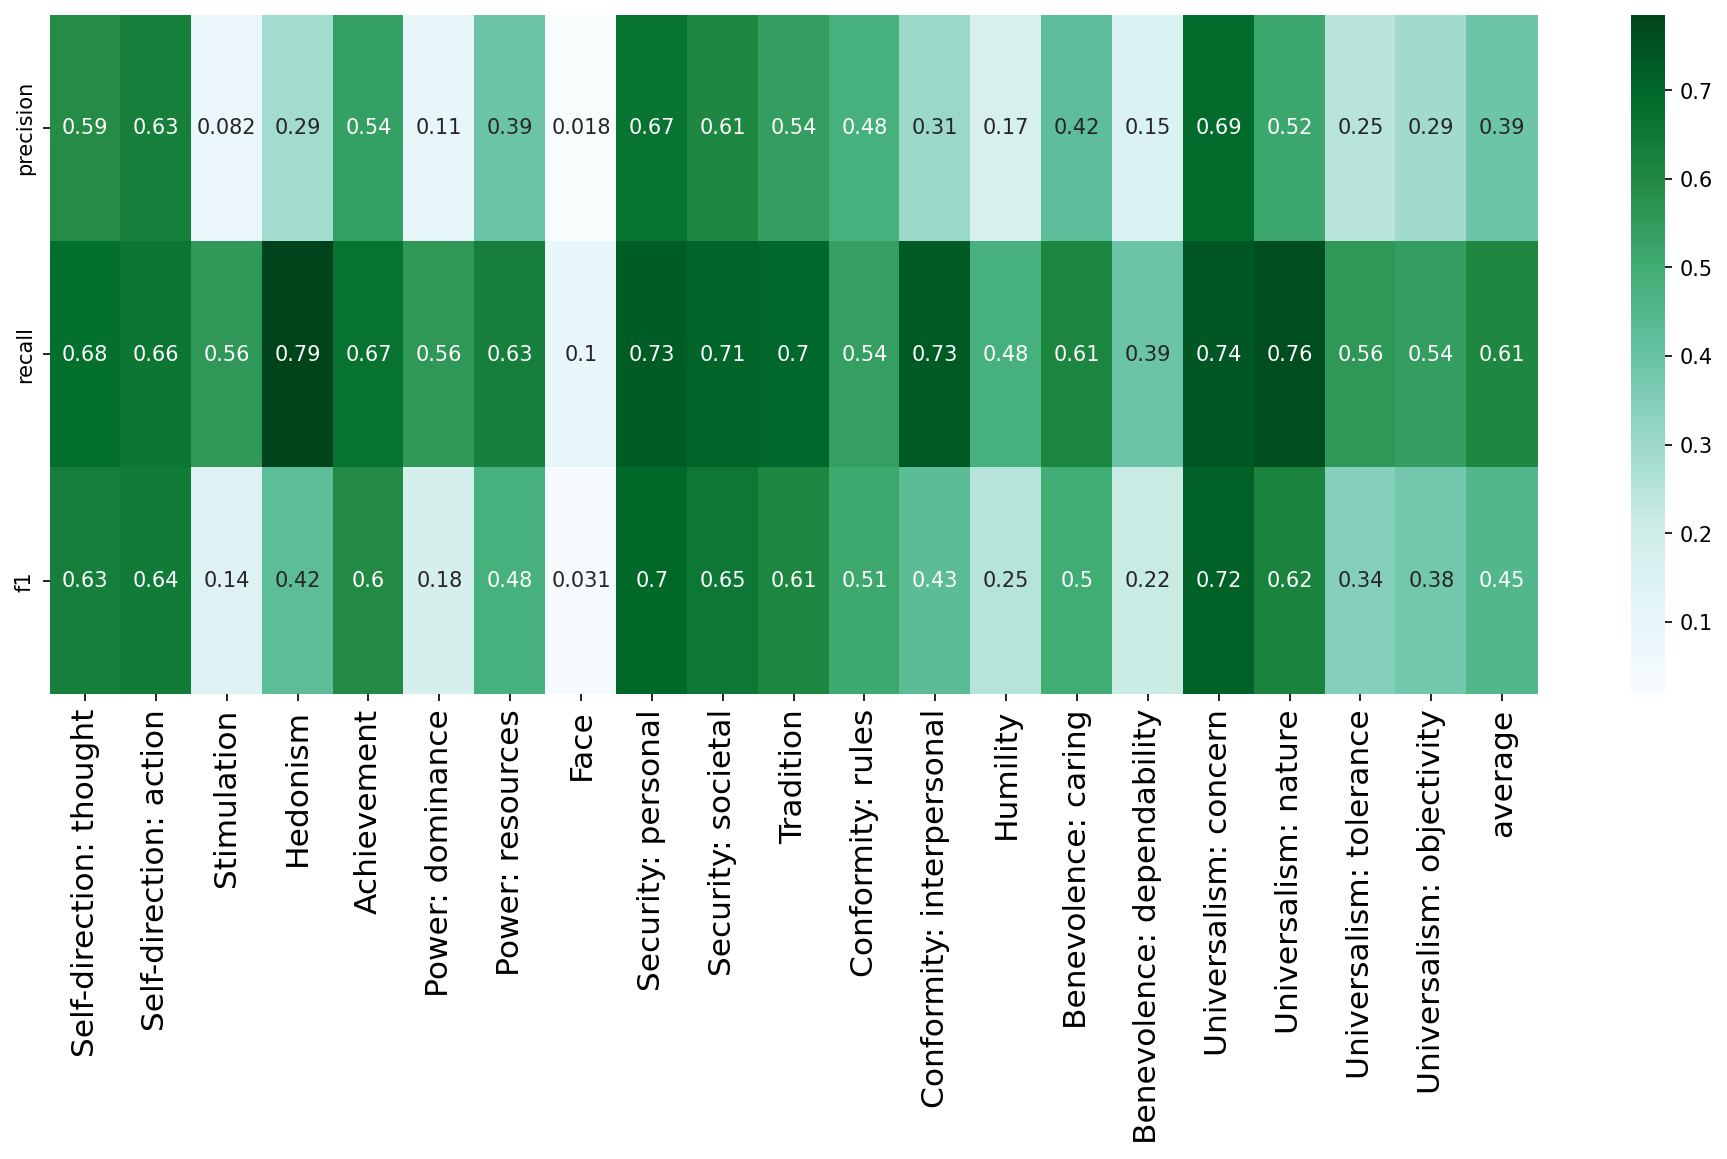

In [ ]:
plt.figure(dpi=150, figsize=(16,6))
sns.heatmap(prfDf, cmap="BuGn", annot=True)
plt.xticks(size=15)

In [ ]:
k = random.choice(X_val.index)
print("Someone that said: ")
print(X_val.Premise[k].upper())
print("is in favor of:" if X_val.Stance[k]==1 else "is against of:")
print(X_val.Conclusion[k].upper())
binhv = np.round(predictions.predhis[7][k])
{y_train.columns[i]: (int(binhv[i]), y_val.loc[k][i]) for i in range(20)}

Someone that said: 
EVERY JOURNALIST SHOULD BE ABLE TO REPORT THE NEWS REGARDLESS OF WHETHER THEY HAVE THE MONETARY MEANS TO DO SO OR NOT.
is in favor of:
WE SHOULD SUBSIDIZE JOURNALISM


{'Self-direction: thought': (1, 1),
 'Self-direction: action': (1, 1),
 'Stimulation': (0, 0),
 'Hedonism': (0, 0),
 'Achievement': (0, 1),
 'Power: dominance': (0, 0),
 'Power: resources': (0, 1),
 'Face': (0, 0),
 'Security: personal': (0, 0),
 'Security: societal': (0, 0),
 'Tradition': (0, 0),
 'Conformity: rules': (0, 0),
 'Conformity: interpersonal': (0, 0),
 'Humility': (0, 0),
 'Benevolence: caring': (1, 0),
 'Benevolence: dependability': (0, 0),
 'Universalism: concern': (0, 1),
 'Universalism: nature': (0, 0),
 'Universalism: tolerance': (0, 0),
 'Universalism: objectivity': (1, 0)}

#**NN-C: TRANSFORMER**

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertModel, BertTokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
maxLen=200
embDim=200
dim=len(y_train.columns)

In [ ]:
def tokenize_data(data):

    tokenized_data = []
    for i in range(len(data)):
        tokenized_data.append(np.array(tokenizer.encode(data[i],
                            max_length=maxLen,
                            padding="max_length",
                            truncation=True,
                            return_tensors="np")[0]))

    return np.array(tokenized_data)

In [ ]:
def initialize_positional_embedding(dim, maxLen):
    return [[cos(pos / pow(10000,(2*i)/dim)) if i%2==0 else sin(pos / pow(10000,(2*i)/dim)) for i in range(dim) ] for pos in range(maxLen)]

In [ ]:
def positional_encoding(sent):
    posEmbVecs = initialize_positional_embedding(embDim, maxLen)
    return sent+posEmbVecs

In [ ]:
def create_mask():


In [ ]:
xIn = Input(shape=(maxLen,), name="Transformer")
x = layers.Embedding(tokenizer.vocab_size, embDim, name="wordEmbeddings")(xIn)
x = layers.Lambda(positional_encoding, name="positionalEncodingAddition")(x)

mask = create_mask()

y = layers.MultiHeadAttention(num_heads=3, key_dim=embDim, attention_mask=mask, name="MHA")(x, x)

y = layers.Dropout(.1, input_shape=y.shape, name="Dropout1")(y)
y = layers.LayerNormalization(epsilon=1e-6, name="AddNNorm1")(y + x)model = Model(inputs=xIn, outputs=xOut)

model.compile(loss="mse",
              optimizer=Adam(learning_rate=1e-4), metrics=["acc"])

plot_model(model, show_shapes=True)

x = Dense(embDim, name="FFN2")(x)
x = Dense(embDim, activation="relu", name="FFN3")(x)
x = Dense(embDim, name="FFN4")(x)

x = layers.Dropout(.1, name="Dropout2")(x)
x = layers.LayerNormalization(epsilon=1e-6, name="AddNNorm2")(y + x)

x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(.1, name="Dropout3")(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(.1, name="Dropout4")(x)
xOut = Dense(dim, activation="sigmoid")(x)

x = layers.Reshape((maxLen*embDim,))(x)

model = Model(inputs=xIn, outputs=xOut)

model.compile(loss="mse",
              optimizer=Adam(learning_rate=1e-4), metrics=["acc"])

plot_model(model, show_shapes=True)

In [ ]:
X_tok = tokenize_data(X_train.Premise)

In [ ]:
xmpEmb = model.fit(X_tok, y_train,
                    epochs=30,
                    batch_size=20)

In [ ]:
X_val_tok = tokenize_data(X_val.Premise)

#**PREPROCESAMIENTO NN-B**

In [ ]:
!pip install transformers
from transformers import BertModel, BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
import tensorflow_hub as hub

module_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'
bert_layer = hub.KerasLayer(module_url, trainable=True)

In [ ]:
def bert_encode(texts, tokenizer, max_len=32):
    all_tokens = []
    all_masks = []
    all_segments = []

    for text in texts:
        text = tokenizer.tokenize(text)

        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)

        tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len

        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)

    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [ ]:
encodedConclusionTrain = bert_encode(X_train.Conclusion, tokenizer)
encodedPremisesTrain = bert_encode(X_train.Premise, tokenizer)
encodedConclusionVal = bert_encode(X_val.Conclusion, tokenizer)
encodedPremisesVal = bert_encode(X_val.Premise, tokenizer)
encodedConclusionTest = bert_encode(X_test.Conclusion, tokenizer)
encodedPremisesTest = bert_encode(X_test.Premise, tokenizer)

#**NN-B: BERT**

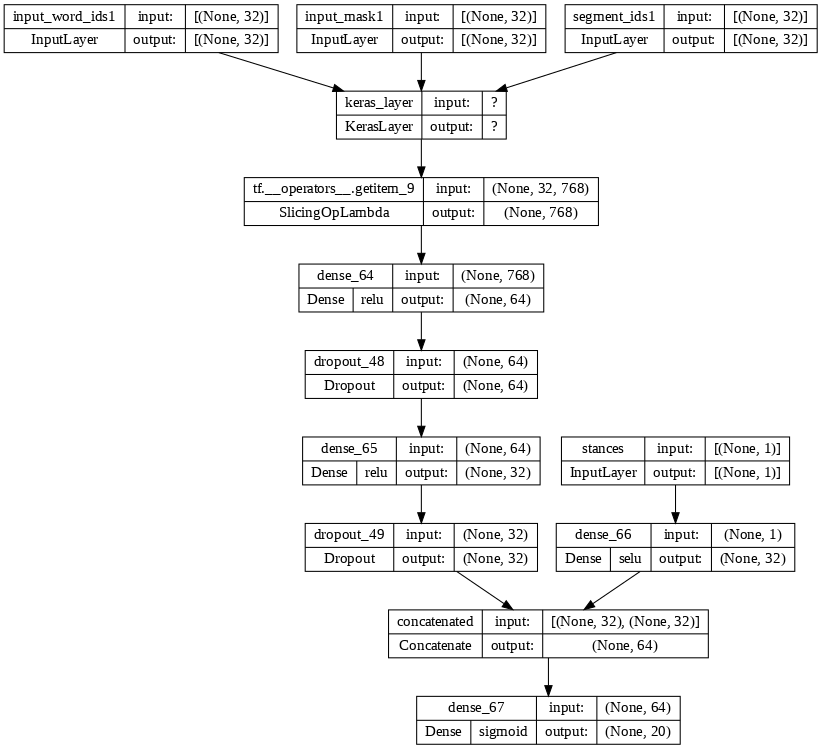

In [ ]:
max_len = 32

aIn = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids1")
aMaskIn = Input(shape=(max_len,), dtype=tf.int32, name="input_mask1")
aSegIn = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids1")
pooled_output, sequence_output = bert_layer([aIn, aMaskIn, aSegIn])
clf_output = sequence_output[:, 0, :]
net = tf.keras.layers.Dense(64, activation='relu')(clf_output)
net = tf.keras.layers.Dropout(0.2)(net)
net = tf.keras.layers.Dense(32, activation='relu')(net)
net1 = tf.keras.layers.Dropout(0.2)(net)

cIn = Input(shape=(1,), name="stances")
net2 = Dense(32, activation="selu")(cIn)

z = concatenate([net1, net2], name="concatenated")

# z = Dense(128, activation='relu')(z)
# z = Dropout(0.2)(z)
# z = Dense(64, activation='relu')(z)
# z = Dropout(0.2)(z)
# z = Dense(32, activation='relu')(z)
# z = Dropout(0.2)(z)

zOut = Dense(20,activation='sigmoid')(z)

model = Model(inputs=((aIn, aMaskIn, aSegIn), cIn), outputs=zOut)

model.compile(loss="mse",
              optimizer=Adam(learning_rate=3e-4), metrics=["acc"])

plot_model(model,
           show_shapes=True,
           to_file='/content/drive/MyDrive/tp4/human-values/nnHumanValuesLSTM.png',
           dpi=75,
           show_layer_activations=True
           )

In [ ]:
trainInput = (encodedConclusionTrain, X_train[["Stance"]])
valInput = (encodedConclusionVal, X_val[["Stance"]])
testInput = (encodedConclusionTest, X_test["Stance"])

class prediction_history(Callback):
    def __init__(self):
        self.predhis = []
    def on_epoch_end(self, epoch, logs={}):
        self.predhis.append(model.predict(valInput))

predictions = prediction_history()

earlyStopping = EarlyStopping(
    monitor="val_loss",
    patience=8,
    verbose=1,
    mode="min"
)

modelCheckpoint = ModelCheckpoint(
    "best_m.h5",
    monitor="val_acc",
    verbose=1,
    mode="max",
    save_best_only=True
)

history = model.fit(
    trainInput,
    y_train,
    batch_size=64,
    epochs=20,
    validation_data=(valInput, y_val),
    callbacks=[predictions,earlyStopping,modelCheckpoint]
)

Epoch 1/20
31/31 [==============================] - 3s 69ms/step

Epoch 1: val_acc improved from -inf to 0.03984, saving model to best_m.h5
46/46 [==============================] - 35s 645ms/step - loss: 0.2050 - acc: 0.0647 - val_loss: 0.1795 - val_acc: 0.0398
Epoch 2/20
31/31 [==============================] - 2s 68ms/step

Epoch 2: val_acc did not improve from 0.03984
46/46 [==============================] - 23s 505ms/step - loss: 0.1804 - acc: 0.0467 - val_loss: 0.1604 - val_acc: 0.0398
Epoch 3/20
31/31 [==============================] - 2s 67ms/step

Epoch 3: val_acc did not improve from 0.03984
46/46 [==============================] - 23s 505ms/step - loss: 0.1634 - acc: 0.0473 - val_loss: 0.1456 - val_acc: 0.0398
Epoch 4/20
31/31 [==============================] - 2s 67ms/step

Epoch 4: val_acc did not improve from 0.03984
46/46 [==============================] - 23s 499ms/step - loss: 0.1521 - acc: 0.0436 - val_loss: 0.1371 - val_acc: 0.0398
Epoch 5/20
31/31 [==================

#**Intento de PLM**

In [ ]:
!pip install pyprobs
from pyprobs import Probability as pr
from keras import backend as K

In [ ]:
def PLM(y_true, y_pred):

    iR=0.8 # RATIO IDEAL
    cols, rows = y_true.shape

    # Make Mask
    mask = [[] for c in range(cols)]

    for c in range(cols):
        positives = y_true[c].sum()
        rR = positives/(rows-positives)

        for i in range(rows):
            if rR >= iR and y_true[c][i]==1:
                mask[c].append(int(pr.prob(iR/rR)))
            elif rR < iR and y_true[c][i]==0:
                mask[c].append(int(pr.prob(rR/iR)))
            else:
                mask[c].append(1)

    #Masking loss
    loss = K.sum(mask*K.pow((y_pred-y_true),2), axis=-1)
    return tf.cast(loss, dtype="float32")

In [ ]:
keras.losses.MSE(y_true, y_pred)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.28751293, 0.5809461 , 0.5677851 ], dtype=float32)>

In [ ]:
PLM(y_true, y_pred)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.4375646, 2.9047303, 2.8389256], dtype=float32)>

In [ ]:
X = [[2,5,11],[5,6,8],[0,4,7]]
y = [[1,0,1,0,0],[0,1,1,0,1],[1,0,0,0,1]]
y_true = pd.DataFrame(y).to_numpy()
y_true.shape

(3, 5)

In [ ]:
a = Input(shape=(3,))
b = Dense(32, activation="relu")(a)
b = Dense(16, activation="relu")(b)
b = Dense(5, activation="sigmoid")(b)

model = Model(inputs=a, outputs=b)

model.compile(loss=PLM,
              optimizer=Adam(learning_rate=1e-2), metrics=["acc"])

In [ ]:
y_pred = model.predict(X)

1/1 [==============================] - 0s 251ms/step


In [ ]:
history = model.fit(
    X,
    y,
    epochs=10
)

Epoch 1/10


TypeError: ignored

# SE QUEBRÓ